# Multi-Output Linear & Classification : Age, Gender, and Ethnicity

## Introduction

In this assignment, we aim to estimate age and classify gender and ethnicity using the UTK Faces dataset obtained from Kaggle. The dataset contains images of faces along with corresponding labels for age, gender, and ethnicity. Leveraging this dataset, we will apply pretrained model techniques to achieve accurate multi-output predictions.

## Dataset

The UTK Faces dataset is a comprehensive collection of facial images with annotations for age, gender, and ethnicity. It is widely used in computer vision research for tasks involving facial attribute estimation. The dataset includes images of diverse individuals, making it ideal for training models that can generalize well across different demographics.

## Objective

The primary objectives of this assignment are:
1. **Age Estimation**: Predict the age of individuals from their facial images.
2. **Gender Classification**: Classify the gender of individuals as either male or female.
3. **Ethnicity Classification**: Identify the ethnicity of individuals from predefined categories.

## Methodology

To achieve these objectives, we will utilize pretrained models, which have already been trained on large datasets and possess the capability to extract meaningful features from images. By fine-tuning these models on the UTK Faces dataset, we can leverage their learned representations to enhance the accuracy of our predictions.

## Pretrained Models

Pretrained models are deep learning models that have been previously trained on extensive datasets, such as ImageNet. These models have learned to recognize a wide variety of features and patterns, making them suitable for transfer learning. In this assignment, we will experiment with various pretrained models, including but not limited to:

- **VGG16**
- **ResNet50**
- **InceptionV3**
- **MobileNetV2**

## Implementation

The implementation will involve the following steps:
1. **Data Preprocessing**: Prepare the dataset by resizing images, normalizing pixel values, and encoding labels.
2. **Model Selection**: Choose appropriate pretrained models for each task (age estimation, gender classification, and ethnicity classification).
3. **Fine-Tuning**: Fine-tune the pretrained models on the UTK Faces dataset to adapt them to our specific tasks.
4. **Evaluation**: Evaluate the performance of the models using appropriate metrics and analyze the results.

By the end of this assignment, we aim to develop robust models capable of accurately estimating age and classifying gender and ethnicity from facial images. The use of pretrained models will significantly expedite the training process and improve the overall performance of our models.

Let's get started!

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [5]:
!kaggle datasets download -d jangedoo/utkface-new

Dataset URL: https://www.kaggle.com/datasets/jangedoo/utkface-new
License(s): copyright-authors
100% 331M/331M [00:15<00:00, 24.6MB/s]
100% 331M/331M [00:15<00:00, 22.2MB/s]


In [6]:
import zipfile
zip = zipfile.ZipFile("/content/utkface-new.zip",'r')
zip.extractall("/content")
zip.close()

In [7]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation: Extracting Age, Gender, and Ethnicity from Image Filenames

In this section, we prepare our dataset by extracting age, gender, and ethnicity information from the filenames of the images. Each filename in the UTK Faces dataset follows a specific naming convention: `age_gender_ethnicity_date.jpg`. For example, a filename might be `25_1_3_20170116174525125.jpg.chip.jpg`, where `25` represents the age, `1` represents the gender (1 for male, 0 for female), and `3` represents the ethnicity (encoded as integers 0-4 for different ethnic groups).

To extract this information, we perform the following steps:
1. **Set Seed and Shuffle Filenames**: We set a random seed to ensure reproducibility and shuffle the list of filenames to randomize the order.
2. **Initialize Lists**: We create empty lists to store the extracted labels and image paths.
3. **Extract Labels**: We iterate through each filename, split the filename string by underscores (`_`), and append the extracted age, gender, and ethnicity labels to their respective lists. Additionally, we store the image path for each image.

Here is the code snippet that accomplishes this:

In [8]:
dataset_path = Path('/content/utkface_aligned_cropped/crop_part1')
filenames = list(map(lambda x: x.name, dataset_path.glob('*.jpg')))
print(len(filenames))
print(filenames[:10])

9780
['58_1_0_20170110151504170.jpg.chip.jpg', '1_1_2_20161219200100707.jpg.chip.jpg', '2_1_2_20161219215651168.jpg.chip.jpg', '1_1_2_20161219142147841.jpg.chip.jpg', '15_1_0_20170109214319385.jpg.chip.jpg', '33_1_0_20170103181128408.jpg.chip.jpg', '22_0_0_20170110232206562.jpg.chip.jpg', '26_1_3_20170104223140343.jpg.chip.jpg', '25_1_3_20161220221512186.jpg.chip.jpg', '10_1_1_20170109204636561.jpg.chip.jpg']


#### By the end of this process, we have three lists containing the age, gender, and ethnicity labels, and a list of image paths. These lists can then be used to create a pandas DataFrame, which will facilitate further data manipulation and model training.

In [9]:
# Lists to store extracted information
age = []
gender = []
ethnicity = []
image_paths = []

# Function to extract information from filename
def extract_info_from_filename(filename):
    try:
        # Split the filename by '_'
        parts = filename.split('_')
        # Extract age, gender, race assuming the format: age_gender_race_some_id.jpg
        extracted_age = int(parts[0])
        extracted_gender = int(parts[1])
        extracted_ethnicity = int(parts[2])
        return extracted_age, extracted_gender, extracted_ethnicity
    except (ValueError, IndexError) as e:
        # Handle cases where the filename does not conform to the expected format
        print(f"Skipping file {filename}: {e}")
        return None

In [10]:
# Iterate over files in the dataset directory
for file in os.listdir(dataset_path):
    # Extract information from filename
    info = extract_info_from_filename(file)
    if info:
        # Append extracted information to lists
        extracted_age, extracted_gender, extracted_ethnicity = info
        age.append(extracted_age)
        gender.append(extracted_gender)
        ethnicity.append(extracted_ethnicity)
        image_paths.append(os.path.join(dataset_path, file))

Skipping file 61_1_20170109142408075.jpg.chip.jpg: invalid literal for int() with base 10: '20170109142408075.jpg.chip.jpg'
Skipping file 61_3_20170109150557335.jpg.chip.jpg: invalid literal for int() with base 10: '20170109150557335.jpg.chip.jpg'


In [11]:
# Convert lists to numpy arrays for model input
age = np.array(age)
gender = np.array(gender)
ethnicity = np.array(ethnicity)

In [12]:
df = pd.DataFrame({'age':age,'gender':gender,'ethnicity':ethnicity, 'image':image_paths})

In [13]:
df.head()

,age,gender,ethnicity,image
0,58,1,0,/content/utkface_aligned_cropped/crop_part1/58...
1,1,1,2,/content/utkface_aligned_cropped/crop_part1/1_...
2,2,1,2,/content/utkface_aligned_cropped/crop_part1/2_...
3,1,1,2,/content/utkface_aligned_cropped/crop_part1/1_...
4,15,1,0,/content/utkface_aligned_cropped/crop_part1/15...


In [14]:
df.ethnicity.nunique()

5

In [15]:
print(df.dtypes)

age           int64
gender        int64
ethnicity     int64
image        object
dtype: object


------
# EDA
--------
## 1. Ethnicity Distribution

Ethnicity Value Counts:
ethnicity
0    5265
2    1553
3    1452
4    1103
1     405
Name: count, dtype: int64


<ipython-input-16-471195d9374c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ethnicity', data=df, palette='viridis')


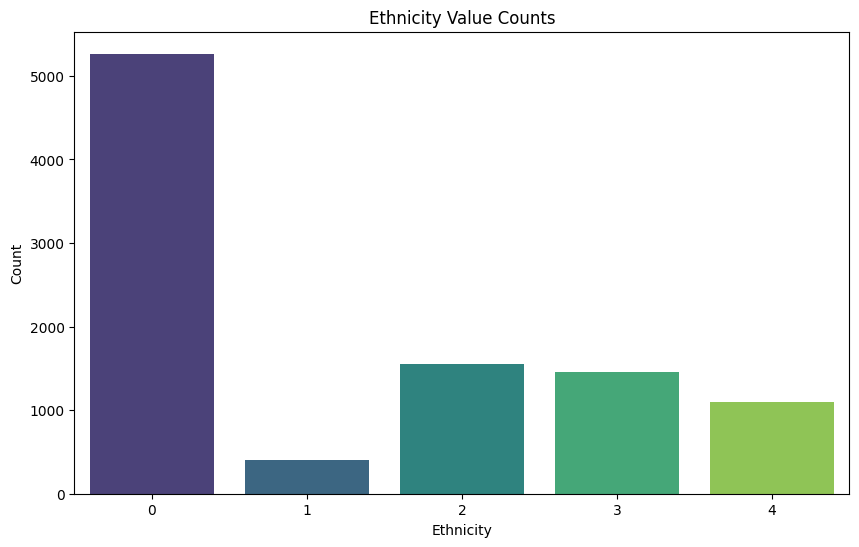

In [16]:
# Print the value counts for ethnicity and gender
print("Ethnicity Value Counts:")
print(df['ethnicity'].value_counts())

# Plot the value counts for ethnicity
plt.figure(figsize=(10, 6))
sns.countplot(x='ethnicity', data=df, palette='viridis')
plt.title('Ethnicity Value Counts')
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.show()

### Ethnicity Value Counts

The ethnicity value counts are as follows:
- **0 (White)**: 5265
- **2 (Asian)**: 1553
- **3 (Indian)**: 1452
- **4 (Others)**: 1103
- **1 (Black)**: 405

#### Insights:
1. **Distribution of Ethnicity**:
   - The dataset includes a diverse representation of different ethnic groups, with the majority being White (5265 images).
   - Asian (1553 images) and Indian (1452 images) ethnicities are also well-represented, while Black (405 images) and Others (1103 images) have fewer samples.

2. **Potential Bias**:
   - There is a significant imbalance in the dataset with a higher number of White images compared to other ethnic groups.
   - This imbalance might affect model training, as the model may learn to predict the majority class (White) more accurately than the minority classes (Black, Others).
   - Consider implementing techniques to handle this imbalance, such as data augmentation for the minority classes, using class weights during training, or oversampling the minority classes.

***********

## 2. Gender Distribution


Gender Value Counts:
gender
1    5406
0    4372
Name: count, dtype: int64


<ipython-input-17-5ccaf1b2cbbb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=df, palette='viridis')


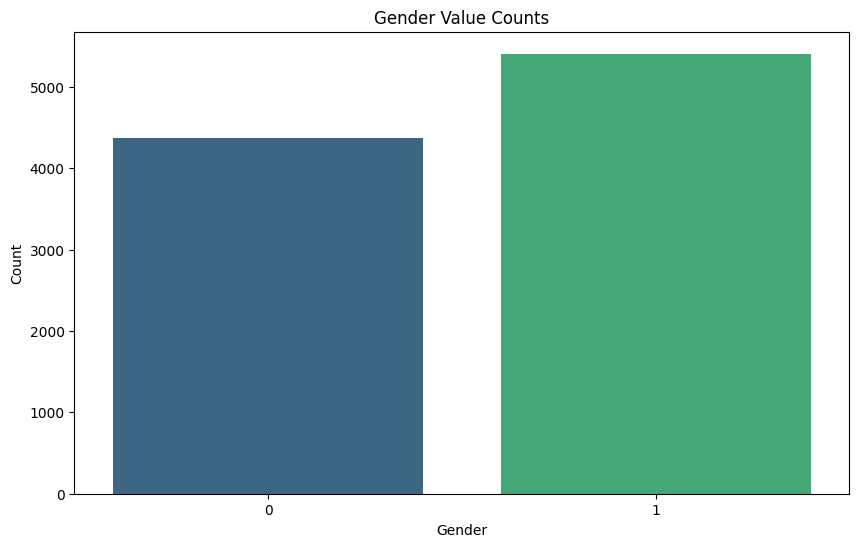

In [17]:
print("\nGender Value Counts:")
print(df['gender'].value_counts())

# Plot the value counts for gender
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', data=df, palette='viridis')
plt.title('Gender Value Counts')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

### Gender Value Counts

The gender value counts are as follows:
- **1 (Male)**: 5406
- **0 (Female)**: 4372

#### Insights:
1. **Distribution of Gender**:
   - The dataset contains more male images (5406) compared to female images (4372).
   - The proportion of male images is approximately 55% (5406 out of 9778), while female images account for about 45% (4372 out of 9778).

2. **Potential Bias**:
   - There is a slight imbalance in the dataset with a higher number of male images compared to female images.
   - This imbalance might affect model training, as the model may learn to predict the majority class (males) more accurately than the minority class (females).
   - Consider implementing techniques to handle this imbalance, such as data augmentation for the minority class, using class weights during training, or oversampling the minority class.
*******

## Distribution of Ages

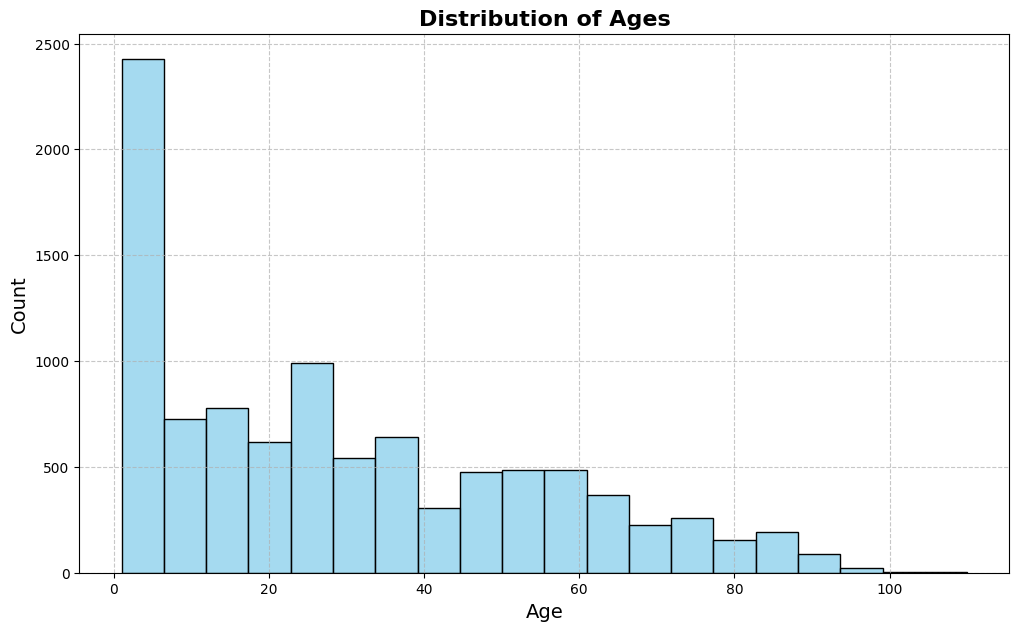

In [18]:
plt.figure(figsize=(12, 7))


sns.histplot(df['age'], bins=20, kde=False, color='skyblue', edgecolor='black')


plt.title('Distribution of Ages', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)


plt.show()

# Plotting Sample Images

In [19]:
# Define gender and ethnicity mappings
gender_dict = {0: "Male", 1: "Female"}
ethnicity_dict = {0: "White", 1: "Black", 2: "Asian", 3: "Indian", 4: "Other"}

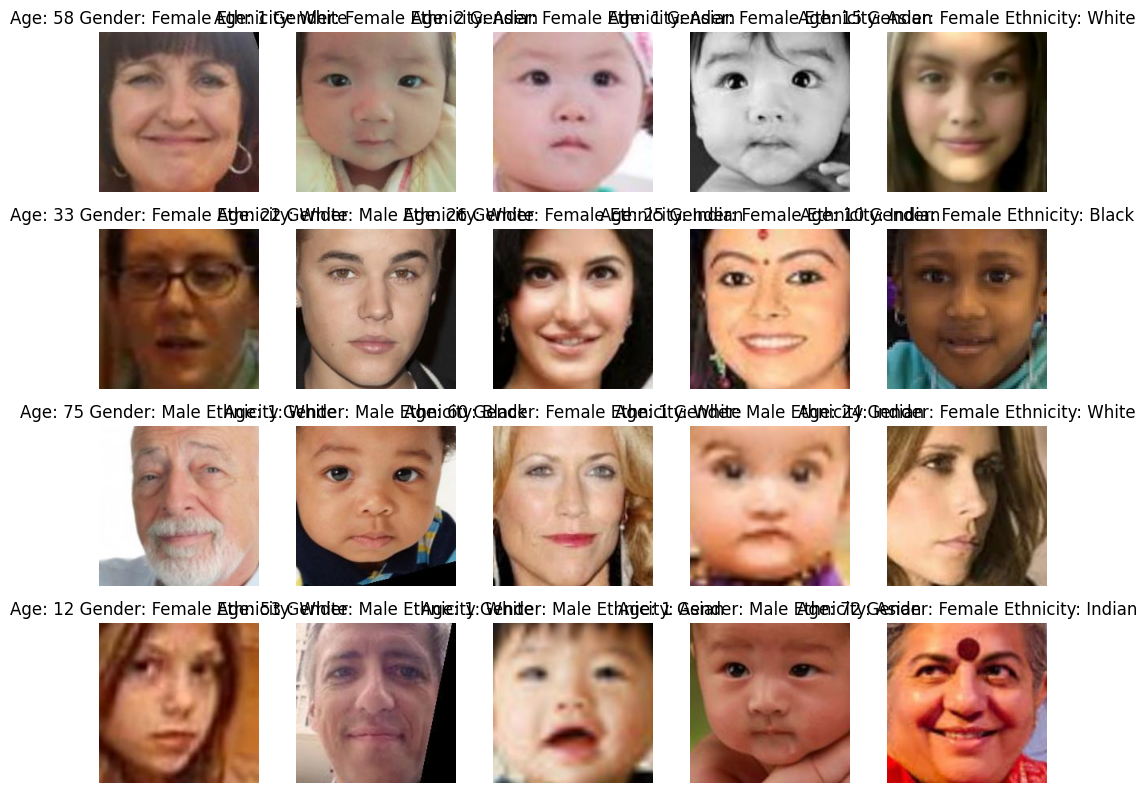

In [20]:
# Select first 20 images
files = df.iloc[0:20]

plt.figure(figsize=(10, 10))

# Loop through the selected rows
for index, row in enumerate(files.itertuples(), start=1):
    plt.subplot(5, 5, index)

    # Load and convert the image
    img = load_img(row.image)  # row.image contains the image path
    img = np.array(img)

    # Display the image
    plt.imshow(img)
    plt.title(f"Age: {row.age} Gender: {gender_dict.get(row.gender, 'Unknown')} Ethnicity: {ethnicity_dict.get(row.ethnicity, 'Unknown')}")
    plt.axis('off')

plt.tight_layout()
plt.show()



In [21]:
df.count()

,0
age,9778
gender,9778
ethnicity,9778
image,9778




### **Train/Test Split**

The images, age, gender, and ethnicity labels are divided into training and testing sets (80% training, 20% testing) with a random state of 42 for reproducibility.


In [22]:
from sklearn.model_selection import train_test_split

# Split the data
train_image_paths, test_image_paths, train_age, test_age, train_gender, test_gender, train_ethnicity, test_ethnicity = train_test_split(
    image_paths, age, gender, ethnicity, test_size=0.2, random_state=42
)

###  **One-Hot Encoding**
The ethnicity labels are one-hot encoded using the `to_categorical` function. This converts the original integer labels for ethnicity (ranging from 0 to 4) into binary class matrices, which are more suitable for multi-class classification tasks.


In [23]:
from tensorflow.keras.utils import to_categorical

# One-hot encode the race labels (assuming race labels are originally integers from 0 to 4)
train_ethnicity = to_categorical(train_ethnicity, num_classes=5)
test_ethnicity = to_categorical(test_ethnicity, num_classes=5)

print('Corrected shape of ethnicity labels:', train_ethnicity.shape)  # Should be (18964, 5)


Corrected shape of ethnicity labels: (7822, 5)


### 3. **Data Augmentation**
The `ImageDataGenerator` class is used to apply data augmentation techniques, such as rotation, width and height shifts, and zoom, to the images in the training set. This helps improve the model’s generalization ability by generating varied versions of the images during training.

### **Custom Data Generator**
A custom data generator is defined to load images and their corresponding labels (age, gender, ethnicity) in batches. This generator allows for efficient data loading, preprocessing (such as resizing and normalizing the images), and augmentation using the `ImageDataGenerator`.



In [35]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create a data generator
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Custom data generator for multi-output model
def custom_data_generator(image_paths, age, gender, ethnicity, batch_size):
    while True:
        for start in range(0, len(image_paths), batch_size):
            end = min(start + batch_size, len(image_paths))
            batch_image_paths = image_paths[start:end]
            batch_age = age[start:end]
            batch_gender = gender[start:end]
            batch_ethnicity = ethnicity[start:end]

            batch_images = []
            for image_path in batch_image_paths:
                image = load_img(image_path, target_size=(224, 224))  # Adjust size as needed
                image_array = img_to_array(image)
                batch_images.append(image_array)

            batch_images = np.array(batch_images)
            # Use next() instead of .next()
            batch_images = next(datagen.flow(batch_images, batch_size=batch_size, shuffle=False))

            yield batch_images, {'age': np.array(batch_age), 'gender': np.array(batch_gender), 'ethnicity': np.array(batch_ethnicity)}


In [36]:
# Define batch size
batch_size = 32

# Create training and validation generators
train_generator = custom_data_generator(train_image_paths, train_age, train_gender, train_ethnicity, batch_size)
validation_generator = custom_data_generator(test_image_paths, test_age, test_gender, test_ethnicity, batch_size)


### **Model Input and Preprocessing**
In this section, a function is created to display sample images from the dataset, resizing them to a uniform size and showing them in a grid. The images are resized and normalized to ensure compatibility with the model’s input format.


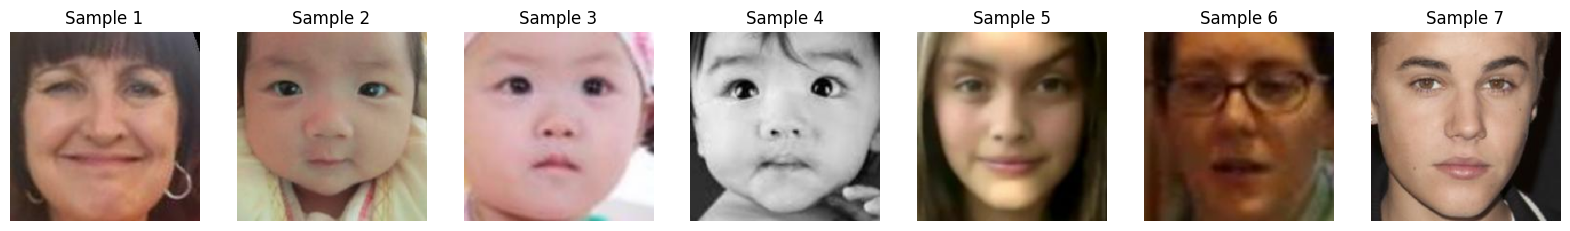

In [37]:
import matplotlib.pyplot as plt

# Function to display images
def display_sample_images(img_paths, num_samples=7):
    plt.figure(figsize=(20, 10))
    for i, img_path in enumerate(img_paths[:num_samples]):
        img = load_img(img_path, target_size=(224, 224))  # Adjust size as needed
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img)
        plt.title(f"Sample {i + 1}")
        plt.axis('off')
    plt.show()

# Display sample images
display_sample_images(image_paths)

### Model Architecture Explanation

1. **Loading ResNet50 Model**:  
   The pre-trained ResNet50 model is loaded without its top fully connected layers (`include_top=False`). This allows customization by adding new output layers for the specific task (predicting age, gender, and ethnicity). The input size is set to 224x224 pixels with 3 color channels (RGB).

2. **Freezing Layers**:  
   Initially, all the layers of ResNet50 are frozen (`trainable=False`) to retain the pre-learned features from large datasets (e.g., ImageNet). This prevents modification of the weights during training.

3. **Unfreezing Last Few Layers**:  
   To fine-tune the model for the specific task, the last 10 layers of ResNet50 are unfrozen (`trainable=True`). This allows the model to adjust higher-level features during training while keeping lower-level features fixed.

4. **Adding Custom Output Layers**:
   - **Flatten Layer**: Converts the multi-dimensional output from ResNet50 into a one-dimensional vector.
   - **Dense Layers**: Three dense layers with 512 neurons each and ReLU activation are added. These layers help the model learn complex features.
   - **Output Layers**:
     - **Age**: A regression output (`Dense(1, activation='linear')`) to predict age as a continuous variable.
     - **Gender**: A binary classification output (`Dense(1, activation='sigmoid')`) for gender prediction (Male or Female).
     - **Ethnicity**: A multi-class classification output (`Dense(5, activation='sigmoid')`) to predict ethnicity with 5 possible classes.

This architecture uses ResNet50 as a feature extractor while customizing the output layers to predict age, gender, and ethnicity.


In [38]:
from keras.applications.resnet50 import ResNet50
from keras.layers import *
from keras.models import Model

In [39]:
resnet = ResNet50(include_top=False, input_shape=(224,224,3))

In [40]:
resnet = ResNet50(include_top=False, input_shape=(224,224,3))

resnet.trainable=False

# Unfreeze the last few layers
for layer in resnet.layers[-10:]:
    layer.trainable = True

# Define the output layers
output = resnet.layers[-1].output
output = resnet.layers[-1].output

flatten = Flatten()(output)

dense1 = Dense(512, activation='relu')(flatten)
dense2 = Dense(512,activation='relu')(flatten)
dense3 = Dense(512,activation='relu')(flatten)

dense4 = Dense(512,activation='relu')(dense1)
dense5 = Dense(512,activation='relu')(dense2)
dense6 = Dense(512,activation='relu')(dense3)

output1 = Dense(1,activation='linear',name='age')(dense3)
output2 = Dense(1,activation='sigmoid',name='gender')(dense4)
output3 = Dense(5,activation='sigmoid',name='ethnicity')(dense6)

In [41]:
model = Model(inputs=resnet.input,outputs=[output1,output2,output3])

### **Model Compilation**
The model is compiled using the Adam optimizer and different loss functions for each of the three outputs:
- **Age**: Mean absolute error (MAE) loss
- **Gender**: Binary cross-entropy loss
- **Ethnicity**: Categorical cross-entropy loss

The metrics used for evaluation during training are MAE for age and accuracy for both gender and ethnicity.




In [42]:
model.compile(
    optimizer='adam',
    loss={
        'age': 'mae',
        'gender': 'binary_crossentropy',
        'ethnicity': 'categorical_crossentropy'
    },
    metrics={
        'age': 'mae',
        'gender': 'accuracy',
        'ethnicity': 'accuracy'
    },
    loss_weights={
        'age': 1.0,
        'gender': 50.0,
        'ethnicity': 1.0
    }
)


In [43]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 126,878,087 (484.00 MB)

 Trainable params: 107,756,039 (411.06 MB)

 Non-trainable params: 19,122,048 (72.94 MB)

### **Callbacks for Early Stopping, Model Checkpoint, and Learning Rate Reduction**
Three callbacks are defined:
- **EarlyStopping**: Stops training if the validation loss doesn’t improve for 10 epochs, restoring the best model weights.
- **ModelCheckpoint**: Saves the model with the best validation loss during training.
- **ReduceLROnPlateau**: Reduces the learning rate by a factor of 0.2 if the validation loss does not improve for 2 epochs.


In [44]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Define the model checkpoint callback to save the best model
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=1)

# Define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6, verbose=1)


### **Model Training**



In [45]:

# Train the model with the added callbacks
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_image_paths) // batch_size,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=len(test_image_paths) // batch_size,
    callbacks=[early_stopping, model_checkpoint, reduce_lr]
)


Epoch 1/5
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step - age_loss: 22.5128 - age_mae: 22.5128 - ethnicity_accuracy: 0.4497 - ethnicity_loss: 2.9409 - gender_accuracy: 0.5124 - gender_loss: 1.6096 - loss: 105.9332
Epoch 1: val_loss improved from inf to 62.05331, saving model to best_model.keras
244/244 ━━━━━━━━━━━━━━━━━━━━ 168s 598ms/step - age_loss: 22.5051 - age_mae: 22.5051 - ethnicity_accuracy: 0.4498 - ethnicity_loss: 2.9362 - gender_accuracy: 0.5124 - gender_loss: 1.6067 - loss: 105.7768 - val_age_loss: 20.7501 - val_age_mae: 20.7501 - val_ethnicity_accuracy: 0.1665 - val_ethnicity_loss: 1.4966 - val_gender_accuracy: 0.4539 - val_gender_loss: 0.7961 - val_loss: 62.0533 - learning_rate: 0.0010
Epoch 2/5
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step - age_loss: 17.2345 - age_mae: 17.2379 - ethnicity_accuracy: 0.4724 - ethnicity_loss: 1.4198 - gender_accuracy: 0.5714 - gender_loss: 0.6844 - loss: 52.9023
Epoch 2: val_loss did not improve from 62.05331
244/244 ━━━━━━━━━━━━━━━━━━━━ 186s 727

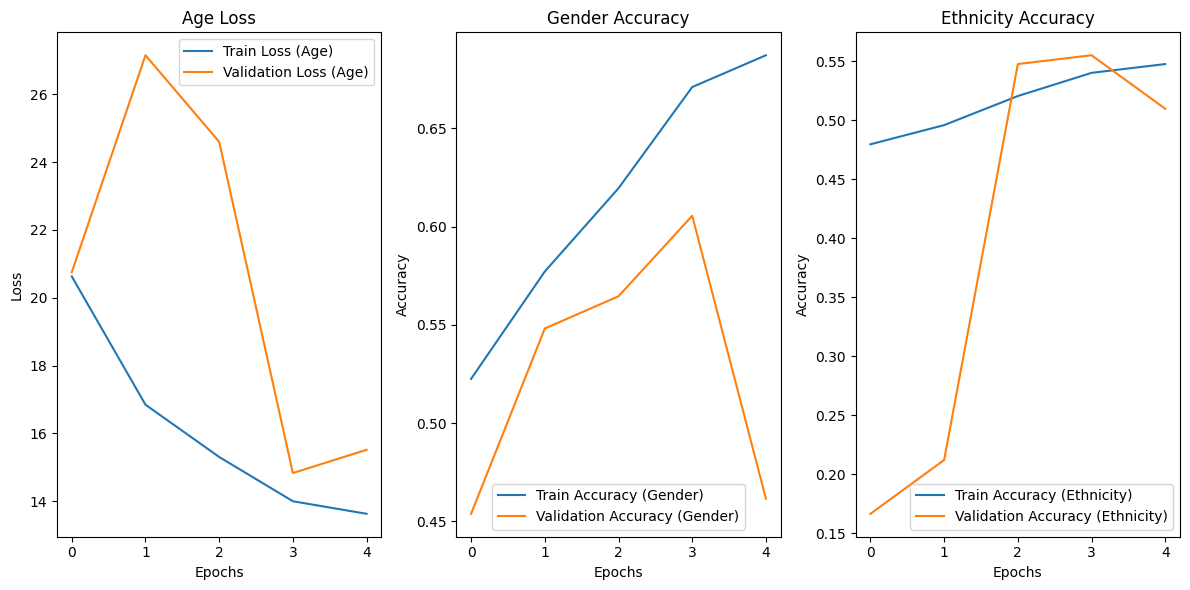

In [46]:
import matplotlib.pyplot as plt

# Plot training & validation loss for age
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.plot(history.history['age_loss'], label='Train Loss (Age)')
plt.plot(history.history['val_age_loss'], label='Validation Loss (Age)')
plt.title('Age Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy for gender
plt.subplot(1, 3, 2)
plt.plot(history.history['gender_accuracy'], label='Train Accuracy (Gender)')
plt.plot(history.history['val_gender_accuracy'], label='Validation Accuracy (Gender)')
plt.title('Gender Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation accuracy for ethnicity
plt.subplot(1, 3, 3)
plt.plot(history.history['ethnicity_accuracy'], label='Train Accuracy (Ethnicity)')
plt.plot(history.history['val_ethnicity_accuracy'], label='Validation Accuracy (Ethnicity)')
plt.title('Ethnicity Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


## Predict on New Image

In [ ]:
# Function to preprocess and predict
def predict_image(img_path, model):
    img = load_img(img_path, target_size=(224, 224))  # Adjust size as needed
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Rescale

    predictions = model.predict(img_array)

    age_pred = predictions[0][0]
    gender_pred = predictions[1][0]
    race_pred = predictions[2][0]

    gender_label = 'Male' if gender_pred >= 0.5 else 'Female'
    race_label = np.argmax(race_pred)

    print(f"Predicted Age: {age_pred}")
    print(f"Predicted Gender: {gender_label}")
    print(f"Predicted Race: {race_label}")

In [ ]:
# Test with a new image
test_img_path = '/content/istockphoto-1384357158-612x612.jpg'
predict_image(test_img_path, loaded_model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted Age: [49.489735]
Predicted Gender: Female
Predicted Race: 0
